# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
cancer = pd.read_csv("breast-cancer-wisconsin-data.csv")

In [3]:
cancer.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [4]:
cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
cancer.shape

(699, 11)

In [8]:
cancer.drop_duplicates(keep=False,inplace=True) 

In [9]:
cancer.shape

(683, 11)

In [10]:
cancer.drop('ID', axis = 1, inplace = True)

In [11]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 683 non-null int64
Cell Size                      683 non-null int64
Cell Shape                     683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Normal Nucleoli                683 non-null int64
Bland Chromatin                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(9), object(1)
memory usage: 58.7+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [12]:
cancer.describe(include='all')

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683,683.000000,683.000000,683.000000,683.000000
unique,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,392,NaN,NaN,NaN,NaN
mean,4.436310,3.125915,3.194729,2.843338,3.206442,NaN,3.433382,2.898975,1.597365,2.688141
std,2.815953,3.030919,2.947513,2.877824,2.184956,NaN,2.446411,3.079120,1.731321,0.950825
min,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [13]:
cancer.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [14]:
cancer['Bare Nuclei'].value_counts()

1     392
10    128
2      30
5      30
3      28
8      19
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [15]:
cancer = cancer.replace('?', np.nan)
cancer = cancer.apply(lambda x: x.fillna(x.median()),axis=0)

In [16]:
cancer['Bare Nuclei']= cancer['Bare Nuclei'].astype('float64')

In [17]:
cancer['Bare Nuclei'].head(60)

0      1.0
1     10.0
2      2.0
3      4.0
4      1.0
5     10.0
6     10.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     3.0
13     3.0
14     9.0
15     1.0
16     1.0
17     1.0
18    10.0
19     1.0
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
25     7.0
26     1.0
27     1.0
28     1.0
29     1.0
30     1.0
31     1.0
32     5.0
33     1.0
34     1.0
35     1.0
36     1.0
37     1.0
38    10.0
39     7.0
40     1.0
41     3.0
43     1.0
44     1.0
45     1.0
46     9.0
47     1.0
48     1.0
49     8.0
50     3.0
51     4.0
52     5.0
53     8.0
54     8.0
55     5.0
56     6.0
57     1.0
58    10.0
59     2.0
60     3.0
Name: Bare Nuclei, dtype: float64

In [18]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [19]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [20]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [21]:
cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.641744,0.652925,0.489557,0.512964,0.591721,0.563792,0.535582,0.350676,0.717911
Cell Size,0.641744,1.000000,0.903901,0.720908,0.742223,0.682845,0.763451,0.731788,0.461504,0.817538
Cell Shape,0.652925,0.903901,1.000000,0.699192,0.708879,0.701181,0.741057,0.730159,0.442361,0.816426
Marginal Adhesion,0.489557,0.720908,0.699192,1.000000,0.617739,0.678655,0.672991,0.601522,0.416689,0.706065
Single Epithelial Cell Size,0.512964,0.742223,0.708879,0.617739,1.000000,0.577605,0.625126,0.639503,0.486362,0.679651
Bare Nuclei,0.591721,0.682845,0.701181,0.678655,0.577605,1.000000,0.671130,0.582183,0.343680,0.814548
Normal Nucleoli,0.563792,0.763451,0.741057,0.672991,0.625126,0.671130,1.000000,0.672310,0.343478,0.756623
Bland Chromatin,0.535582,0.731788,0.730159,0.601522,0.639503,0.582183,0.672310,1.000000,0.426937,0.718929
Mitoses,0.350676,0.461504,0.442361,0.416689,0.486362,0.343680,0.343478,0.426937,1.000000,0.425083
Class,0.717911,0.817538,0.816426,0.706065,0.679651,0.814548,0.756623,0.718929,0.425083,1.000000


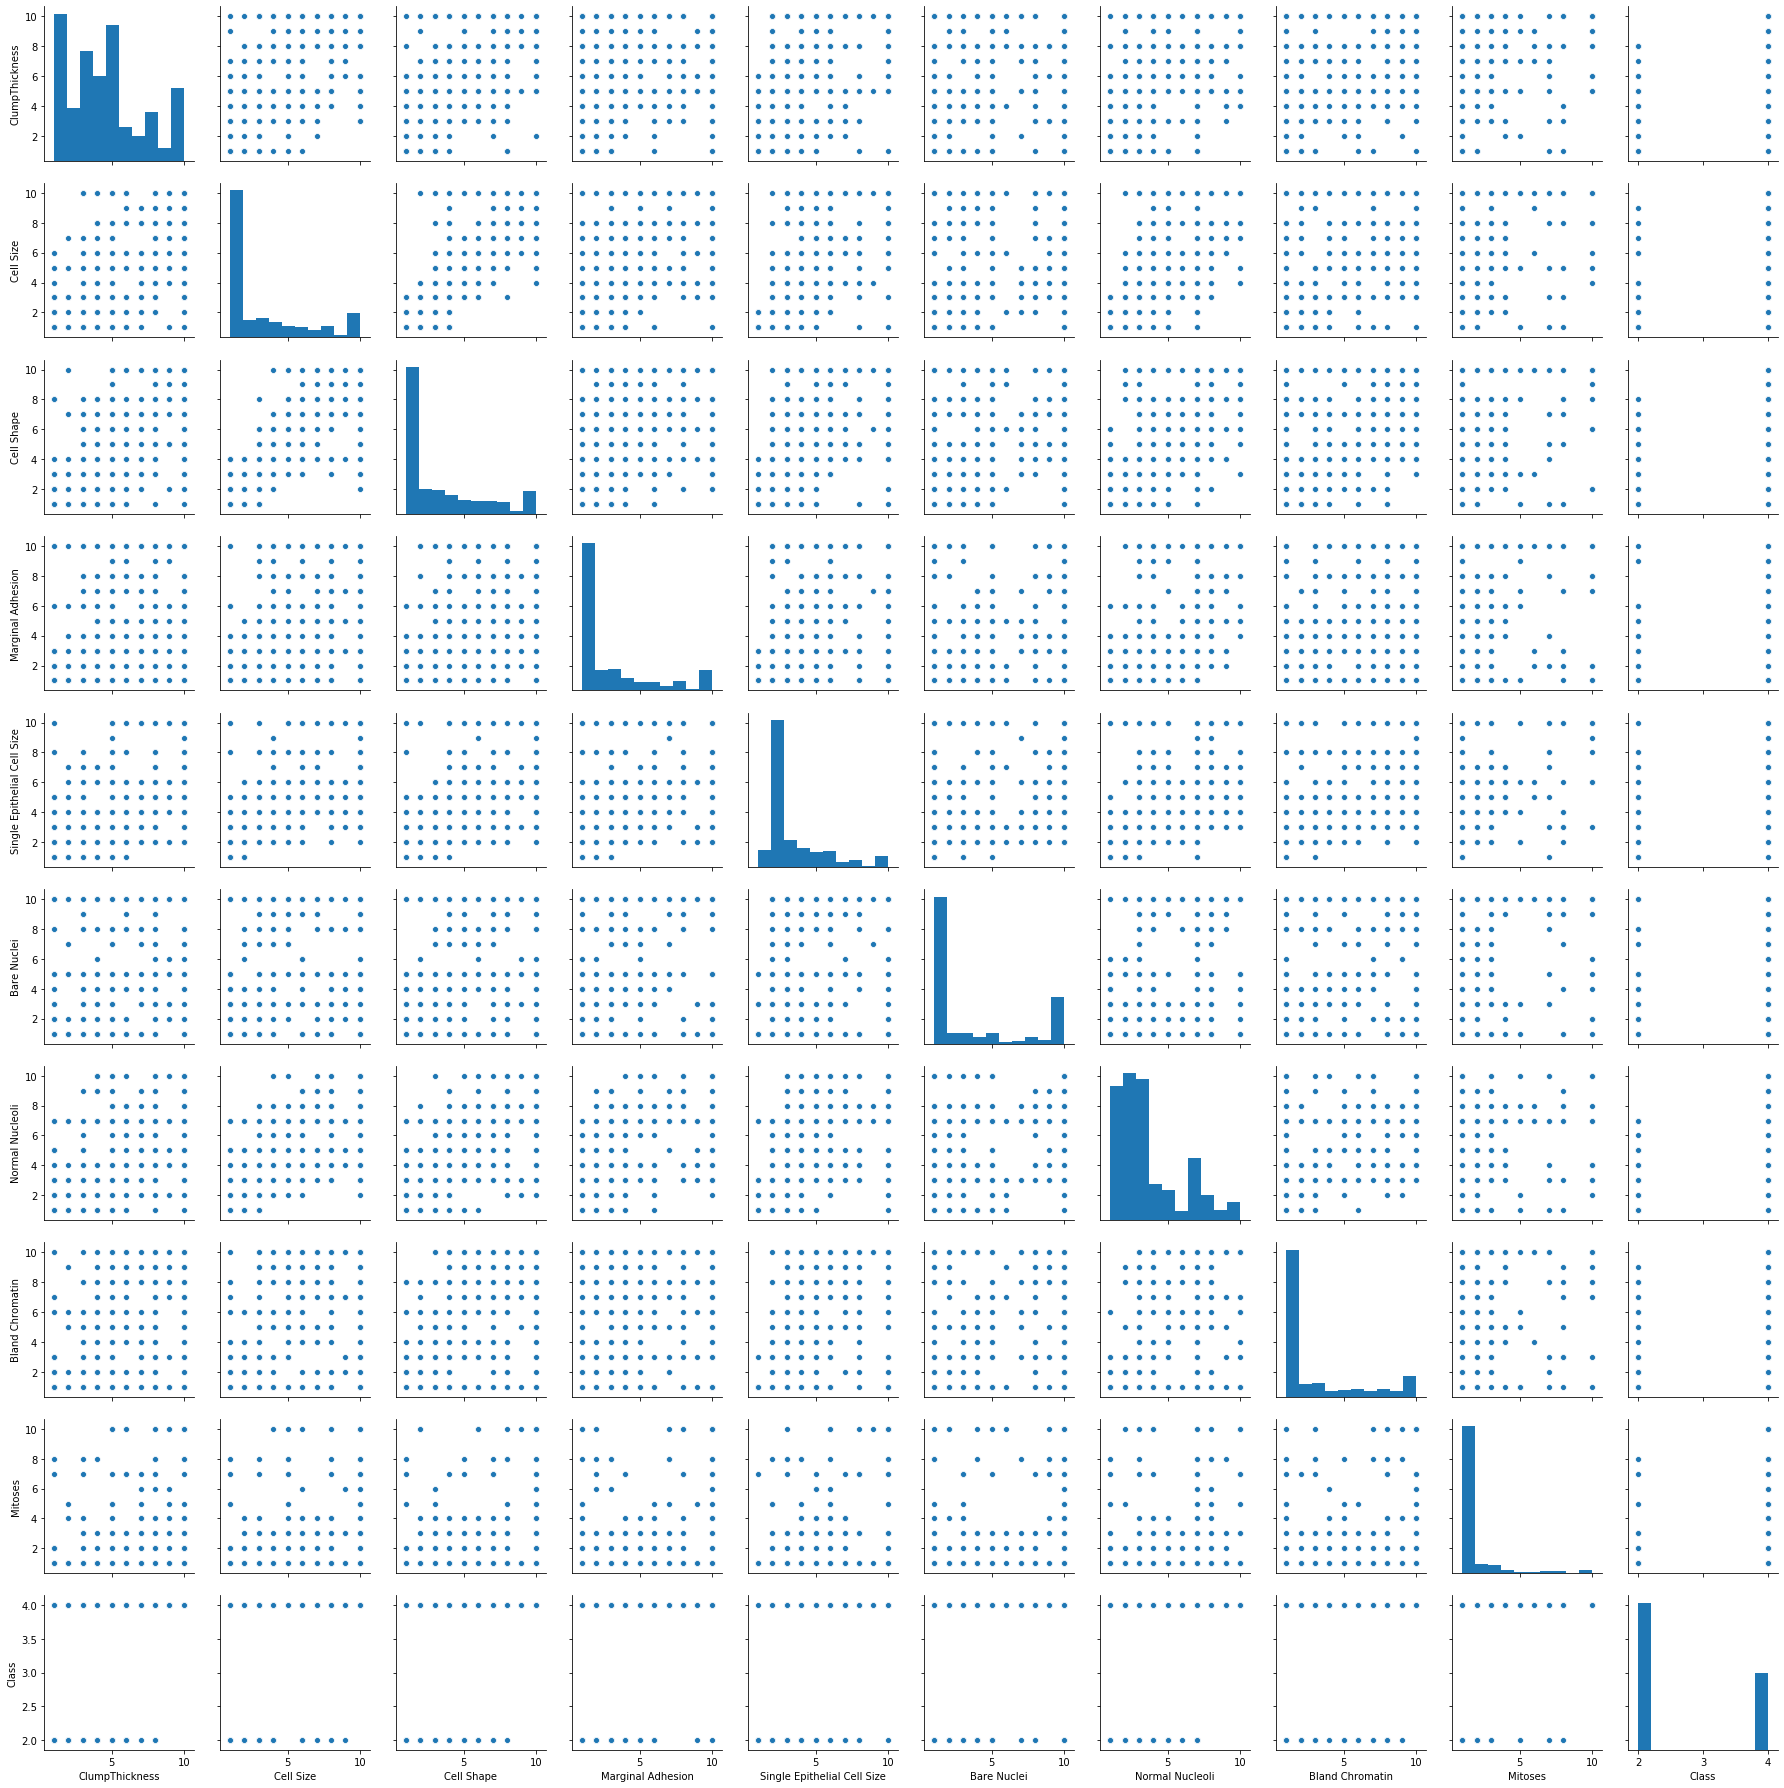

In [22]:
sns.pairplot(cancer)

In [23]:
cancer.corr()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.641744,0.652925,0.489557,0.512964,0.591721,0.563792,0.535582,0.350676,0.717911
Cell Size,0.641744,1.000000,0.903901,0.720908,0.742223,0.682845,0.763451,0.731788,0.461504,0.817538
Cell Shape,0.652925,0.903901,1.000000,0.699192,0.708879,0.701181,0.741057,0.730159,0.442361,0.816426
Marginal Adhesion,0.489557,0.720908,0.699192,1.000000,0.617739,0.678655,0.672991,0.601522,0.416689,0.706065
Single Epithelial Cell Size,0.512964,0.742223,0.708879,0.617739,1.000000,0.577605,0.625126,0.639503,0.486362,0.679651
Bare Nuclei,0.591721,0.682845,0.701181,0.678655,0.577605,1.000000,0.671130,0.582183,0.343680,0.814548
Normal Nucleoli,0.563792,0.763451,0.741057,0.672991,0.625126,0.671130,1.000000,0.672310,0.343478,0.756623
Bland Chromatin,0.535582,0.731788,0.730159,0.601522,0.639503,0.582183,0.672310,1.000000,0.426937,0.718929
Mitoses,0.350676,0.461504,0.442361,0.416689,0.486362,0.343680,0.343478,0.426937,1.000000,0.425083
Class,0.717911,0.817538,0.816426,0.706065,0.679651,0.814548,0.756623,0.718929,0.425083,1.000000


In [24]:
# Check for correlation of variable

In [25]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [26]:
#Let us check for pair plots

In [27]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [28]:
# We could see most of the outliers are now removed.

In [29]:
Y=cancer['Class']
X=cancer.drop(columns='Class')

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()
X_std =  scaler.fit_transform(X)          


# Q6 Create a covariance matrix for identifying Principal components

In [32]:
# PCA
# Step 1 - Create covariance matrix


In [33]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00146628 0.64268541 0.65388211 0.49027485 0.5137159  0.59258872
  0.56461834 0.53636755 0.35119007]
 [0.64268541 1.00146628 0.90522601 0.72196486 0.74331134 0.68384648
  0.76457068 0.73286069 0.46218096]
 [0.65388211 0.90522601 1.00146628 0.70021741 0.7099183  0.70220928
  0.74214403 0.73122981 0.44300916]
 [0.49027485 0.72196486 0.70021741 1.00146628 0.61864498 0.67964981
  0.67397729 0.60240447 0.4172999 ]
 [0.5137159  0.74331134 0.7099183  0.61864498 1.00146628 0.57845196
  0.62604243 0.64044055 0.48707557]
 [0.59258872 0.68384648 0.70220928 0.67964981 0.57845196 1.00146628
  0.67211424 0.58303707 0.34418433]
 [0.56461834 0.76457068 0.74214403 0.67397729 0.62604243 0.67211424
  1.00146628 0.67329615 0.34398191]
 [0.53636755 0.73286069 0.73122981 0.60240447 0.64044055 0.58303707
  0.67329615 1.00146628 0.42756345]
 [0.35119007 0.46218096 0.44300916 0.4172999  0.48707557 0.34418433
  0.34398191 0.42756345 1.00146628]]


# Q7 Identify eigen values and eigen vector

In [34]:
# Step 2- Get eigen values and eigen vector

In [35]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30127908 -0.15248258  0.86939703  0.00386171 -0.01964121 -0.06896661
   0.29942642  0.12408352  0.14113397]
 [-0.38055469 -0.04744357 -0.05056429  0.7376627  -0.17749583 -0.10038627
  -0.43217653  0.27777422  0.02658929]
 [-0.37681845 -0.08172434  0.00920095 -0.66326533 -0.16099367 -0.04581836
  -0.57967629  0.20443477  0.07407408]
 [-0.33586962 -0.05504446 -0.36263845 -0.04493409  0.49934461 -0.01348887
   0.32558114  0.3548647   0.51882267]
 [-0.33540815  0.18350905 -0.19767953 -0.06510935 -0.28548768 -0.74727698
   0.29299414 -0.28039319 -0.07821359]
 [-0.3322296  -0.24645212  0.05360529  0.06851748  0.56595236  0.0202057
  -0.2342227  -0.65056375 -0.15004288]
 [-0.34685533 -0.2296583  -0.17203517 -0.06649968 -0.02773189  0.25975922
   0.32318003  0.28028694 -0.73598922]
 [-0.33714692  0.01663441 -0.14092328  0.02160161 -0.49292602  0.5658051
   0.18425792 -0.3977106   0.332405  ]
 [-0.22968825  0.90407719  0.13636186 -0.00872625  0.21747422  0.19090184
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [36]:
# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.9210245842212865, array([-0.30127908, -0.38055469, -0.37681845, -0.33586962, -0.33540815,
       -0.3322296 , -0.34685533, -0.33714692, -0.22968825])), (0.7780552902526551, array([-0.15248258, -0.04744357, -0.08172434, -0.05504446,  0.18350905,
       -0.24645212, -0.2296583 ,  0.01663441,  0.90407719])), (0.5426537017187093, array([ 0.86939703, -0.05056429,  0.00920095, -0.36263845, -0.19767953,
        0.05360529, -0.17203517, -0.14092328,  0.13636186])), (0.46606137737580616, array([-0.01964121, -0.17749583, -0.16099367,  0.49934461, -0.28548768,
        0.56595236, -0.02773189, -0.49292602,  0.21747422])), (0.36082448877099027, array([-0.06896661, -0.10038627, -0.04581836, -0.01348887, -0.74727698,
        0.0202057 ,  0.25975922,  0.5658051 ,  0.19090184])), (0.3034141056113841, array([ 0.12408352,  0.27777422,  0.20443477,  0.3548647 , -0.28039319,
       -0.65056375,  0.28028694, -0.3977106 ,  0.03367808])), (0.28749569146116305, array([ 0.14113397,  0.02658929,  0.07407408,

In [37]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%

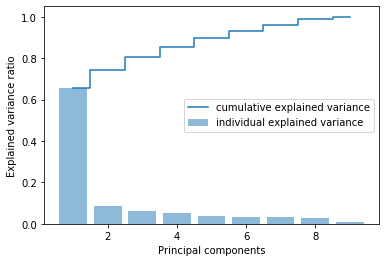

In [38]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [58]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

In [59]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, Y, test_size=test_size, random_state=seed)

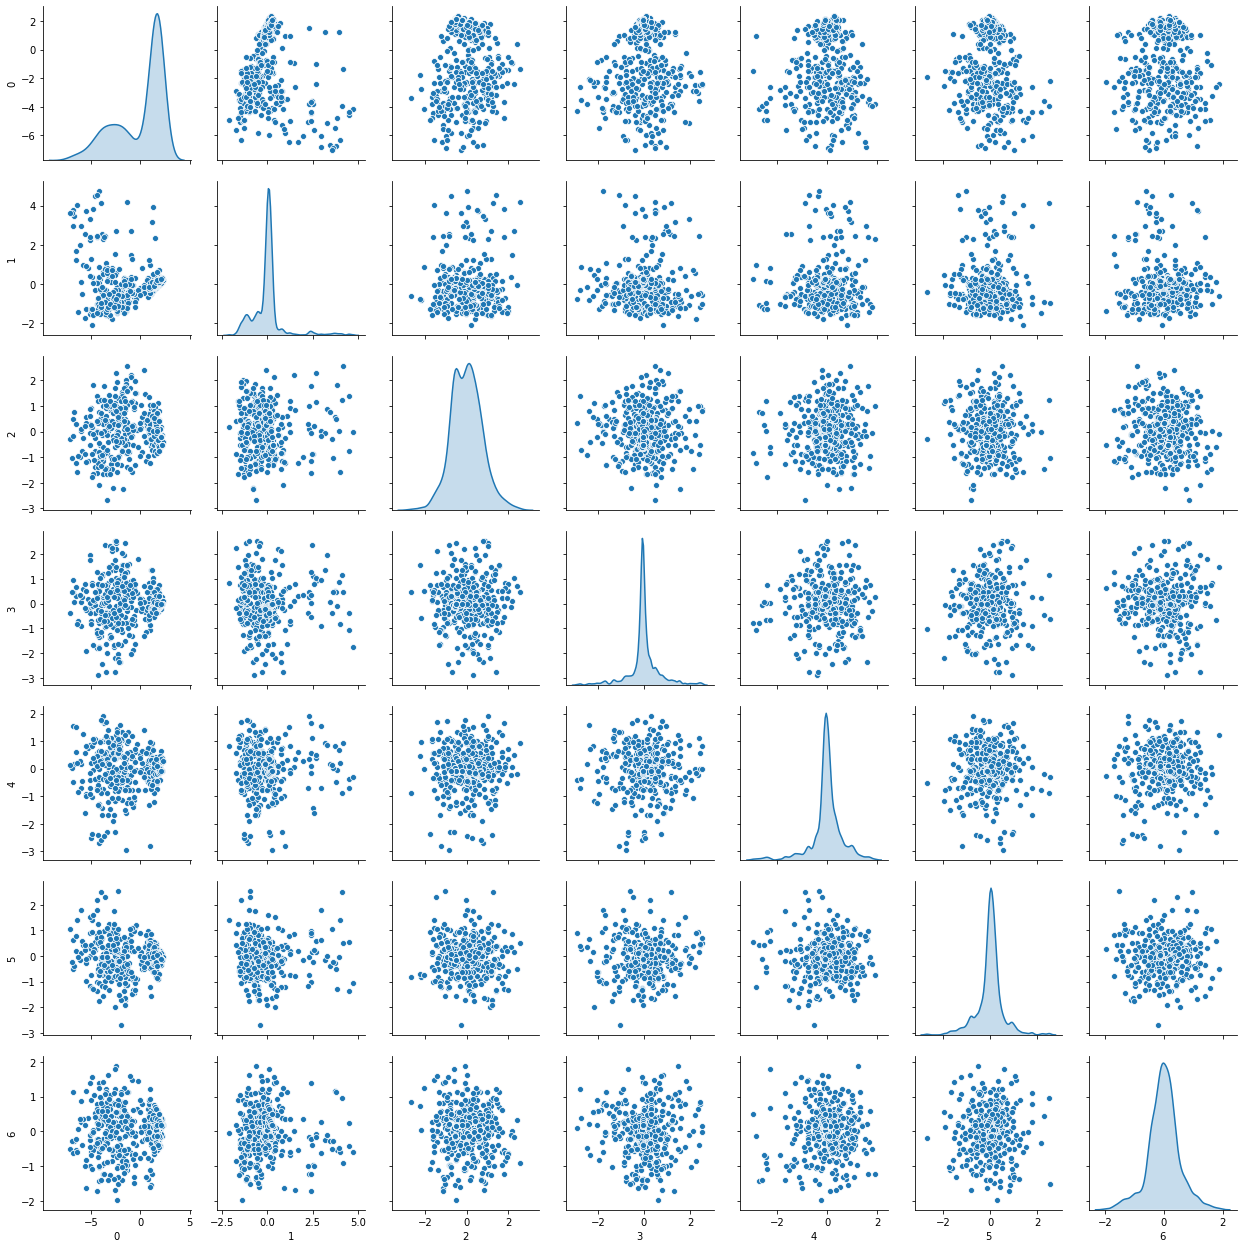

In [60]:
#Let us check it visually
#Proj_data_mpg_df = Proj_data_df.join(Y)

sns.pairplot(Proj_data_df, diag_kind='kde') 

# Q10 Find correlation between components and features

In [42]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-0.34434957, -0.11846099,  0.10693829,  0.06555954])

In [43]:
regression_model.intercept_

2.68235417104806

In [44]:
regression_model.score(X_test, y_test)

0.8072866702659848

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [45]:
jokes = pd.read_excel('jokes.xlsx')

In [46]:
jokes.describe()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
count,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,...,24983.000000,24983.00000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000,24983.000000
mean,72.467478,34.401435,27.094089,33.263717,36.244936,0.427236,19.342119,-0.401803,-0.616110,36.228421,...,61.462019,60.27989,60.421701,59.059621,58.749897,58.541104,58.017246,57.061650,55.753357,60.138090
std,21.859600,46.707059,44.228006,46.747535,48.812967,5.472657,37.860770,5.741616,5.008894,48.228364,...,47.335405,47.94644,47.359847,48.196204,48.310728,48.130562,48.164681,48.717455,49.237139,47.913531
min,36.000000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,...,-9.950000,-9.95000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000,-9.950000
25%,53.000000,-0.150000,-2.180000,-1.145000,-3.350000,-3.690000,-0.390000,-5.290000,-4.610000,-1.775000,...,4.760000,3.59000,4.610000,3.250000,3.160000,3.300000,3.590000,2.670000,1.335000,3.930000
50%,72.000000,5.050000,3.690000,4.660000,3.450000,1.120000,3.540000,-0.050000,-0.290000,4.030000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
75%,100.000000,99.000000,99.000000,99.000000,99.000000,4.470000,8.010000,3.930000,3.060000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
max,100.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.00000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [47]:
jokes.shape

(24983, 101)

# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [48]:
ratings=jokes.iloc[:200,1:]

In [49]:
ratings.shape

(200, 100)

In [50]:
ratings.head(200)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,99.00,99.00,99.00,99.00,7.91,99.00,3.64,-1.89,99.00,99.00,...,2.96,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [51]:
ratings = ratings.replace(99.00, 0)

In [52]:
ratings.head(200)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5.73,0.00,-0.58,1.75,2.86,7.23,2.04,-4.27,3.11,7.14,...,1.70,4.66,1.65,5.58,5.73,3.50,0.00,-2.04,2.91,1.84
196,1.80,5.39,8.06,-0.10,4.81,4.66,-7.09,-7.72,3.69,4.47,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
197,2.62,-3.79,-1.17,-0.44,-1.02,5.05,-3.69,2.18,3.30,-0.73,...,1.41,-2.52,-0.53,-1.89,1.17,-2.04,-1.17,-0.73,0.73,0.44
198,0.00,0.00,0.00,0.00,7.91,0.00,3.64,-1.89,0.00,0.00,...,2.96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [53]:
mean_ratings = ratings.mean(axis = 0)
mean_ratings

Joke1      0.53005
Joke2      0.59390
Joke3      0.23765
Joke4     -0.70100
Joke5     -0.03790
            ...   
Joke96     0.41755
Joke97     0.75500
Joke98     0.09370
Joke99     0.13500
Joke100    0.52440
Length: 100, dtype: float64

In [54]:
#Consider all the mean ratings and find the jokes with the highest mean value and display the top 10 joke IDs

mean_ratings = pd.DataFrame(mean_ratings)
mean_ratings

#mean_ratings.iloc[:,0].argsort()[:-10:-1]

,0
Joke1,0.53005
Joke2,0.59390
Joke3,0.23765
Joke4,-0.70100
Joke5,-0.03790
...,...
Joke96,0.41755
Joke97,0.75500
Joke98,0.09370
Joke99,0.13500


In [55]:
mean_ratings[0].sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: 0, dtype: float64